In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from datetime import datetime as dt
from streamlit_keplergl import keplergl_static

In [3]:
# Load the dataset

df = pd.read_pickle("cleaned_dataset.pkl")

In [4]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
bike_rides_daily               int64
dtype: object

In [5]:
# Create a month column 

df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['month'] = df['date'].dt.month
df['month'] = df['month'].astype('int')

In [6]:
# Create the season column

df['season'] = [
"winter" if (month == 12 or 1 <= month <= 4)
    else "spring" if (4 < month <= 5)
    else "summer" if (6 <= month <= 9)
    else "fall"
for month in df['month']
    ]

In [6]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', 'bike_rides_daily', 'month',
       'season'],
      dtype='object')

### Create the plotly charts

In [7]:
## Groupby

df['value'] = 1 
df_groupby_bar = df.groupby('start_station_name', as_index=False).agg({'value': 'sum'})
top20 = df_groupby_bar.nlargest(20, 'value')

In [ ]:
fig = go.Figure(go.Bar(x = top20['start_station_name'], y = top20['value']))
fig.show()

In [ ]:
fig = go.Figure(go.Bar(x = top20['start_station_name'], y = top20['value'], marker={'color': top20['value'],'colorscale': 'Blues'}))
fig.show()

In [ ]:
## Bar chart

fig.update_layout(
    title = 'Top 20 most popular bike stations in New York',
    xaxis_title = 'Start stations',
    yaxis_title ='Sum of trips',
    width = 900, height = 600
)

#### The next chart's output has been deleted because it inflates the notebook's size a lot

In [ ]:
# Line chart

fig = make_subplots(specs = [[{"secondary_y": True}]])

 fig.add_trace(
 go.Scatter(x = df['date'], y = df['bike_rides_daily'], name = 'Daily bike rides', 
 marker={'color': df['bike_rides_daily'],'color': 'blue'}),
 secondary_y = False)

 fig.add_trace(
 go.Scatter(x=df['date'], y = df['avgTemp'], name = 'Daily temperature', 
 marker={'color': df['avgTemp'],'color': 'red'}),
 secondary_y=True)


In [8]:
import gc # this is a garbage collector
gc.collect()

214

In [9]:
# Save the top 20 stations as a csv file 

top20.to_csv('top20.csv')

In [21]:
top20 = pd.read_csv('top20.csv', index_col = 0)

In [22]:
top20.head()

,start_station_name,value
1587,W 21 St & 6 Ave,129016
1718,West St & Chambers St,123289
495,Broadway & W 58 St,114293
286,6 Ave & W 33 St,106440
8,1 Ave & E 68 St,104856


In [10]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', 'bike_rides_daily', 'month',
       'season', 'value'],
      dtype='object')

### Reduce the row and column count

In [10]:
df_1 = df.drop(columns = {'ride_id', 'rideable_type', 'started_at', 'ended_at',
        'start_station_id', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'month'}) 

In [12]:
df_1.columns

Index(['start_station_name', 'end_station_name', 'date', 'avgTemp',
       'bike_rides_daily', 'season', 'value'],
      dtype='object')

##### The dataset contains over a million rows, and plotting it directly as a line chart caused the visualization to become unresponsive. To fix this, I performed random sampling to reduce the dataset size before plotting.

In [20]:
# Create a random sample

np.random.seed(32)
red = np.random.rand(len(df_1)) <= 0.95

In [21]:
small = df_1[~red]

In [23]:
small.shape

(1490652, 7)

In [ ]:
df_1.to_csv('reduced_data_to_plot.csv')

In [24]:
small.to_csv('reduced_data_to_plot_7.csv',index = False)

In [16]:
df1 = pd.read_csv("reduced_data_to_plot_7.csv", index_col = 0)

In [23]:
df1.head()

,end_station_name,date,avgTemp,bike_rides_daily,season,value
start_station_name,,,,,,
Cleveland Pl & Spring St,Mott St & Prince St,2022-01-01,11.6,20428,winter,1
28 Ave & 35 St,Vernon Blvd & 30 Rd,2022-01-01,11.6,20428,winter,1
Bergen St & Smith St,Atlantic Ave & Furman St,2022-01-01,11.6,20428,winter,1
Schermerhorn St & Bond St,Smith St & 3 St,2022-01-01,11.6,20428,winter,1
Henry St & Grand St,Fulton St & William St,2022-01-01,11.6,20428,winter,1


In [18]:
df_daily = df1.groupby('date').agg({
    'bike_rides_daily': 'first',  # they are identical per date
    'avgTemp': 'first'
}).reset_index()

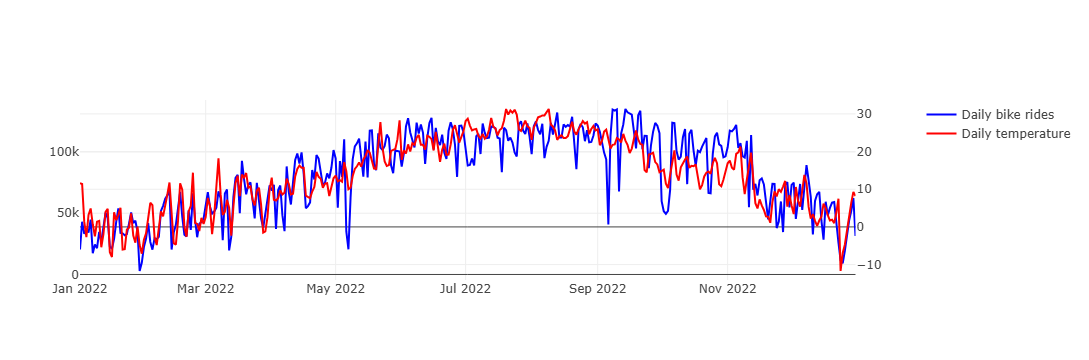

In [19]:
# Line chart
fig = make_subplots(specs = [[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x = df_daily['date'], y = df_daily['bike_rides_daily'], name = 'Daily bike rides', 
 marker={'color': df_daily['bike_rides_daily'],'color': 'blue'}),secondary_y = False)

fig.add_trace(go.Scatter(x=df_daily['date'], y = df_daily['avgTemp'], name = 'Daily temperature', 
 marker={'color': df_daily['avgTemp'],'color': 'red'}),secondary_y=True)

In [16]:
# save the aggregated data for line chart

df_daily.to_csv('aggregated_data_line_chart.csv')